<a href="https://colab.research.google.com/github/sheemasiddiqui/sentiment_analysis/blob/main/SentimentAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading The data

In [29]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Uploading the file
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv.zip to Reviews.csv (1).zip


In [30]:
# Load the csv file
url = 'Reviews.csv.zip'
df = pd.read_csv(url)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# EDA

In [31]:
# Dimension of the dataset
print('The dataframe shape is:', df.shape)
print('\nTherefore the number of rows for the dataset is:', len(df.index))
print('\nThe number of columns is:', len(df.columns))
print('\nThe dimension is:', df.ndim)

The dataframe shape is: (568454, 10)

Therefore the number of rows for the dataset is: 568454

The number of columns is: 10

The dimension is: 2


In [32]:
# The first 10 rows
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [33]:
# The last 10 rows
df.tail(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [34]:
# Finding out missing values
print("Missing Values :\n",df.isnull().sum())

Missing Values :
 Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [35]:
# Dropping the rows that have missing values
df.dropna(inplace=True)
df.isnull().sum()
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [36]:
# Score levels and no. of samples for each level
print('Therefore, the levels and number of samples for each level are as follows:')
samples_levels = df['Score'].value_counts()
samples_levels

Therefore, the levels and number of samples for each level are as follows:


5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

count    568411.000000
mean          4.183309
std           1.310368
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64 



array([[<Axes: title={'center': 'Score'}>]], dtype=object)

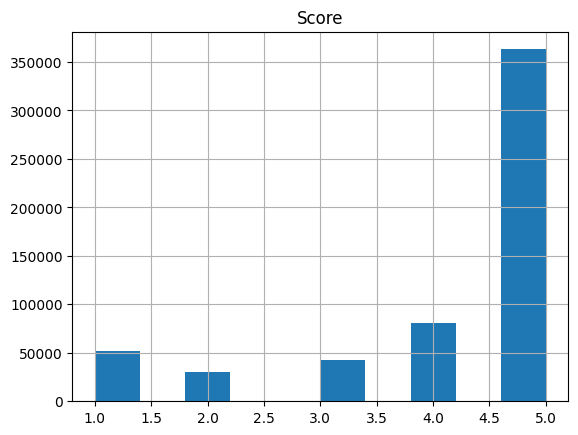

In [37]:
# Find distribution of Score Column
dist_score = df['Score'].describe()
dist_score
print(dist_score,'\n')
# Plotting a distribution plot for Score Column
score_plt = df.hist(column="Score")
score_plt

In [38]:
# No. of words per review
# df['NumofWordsPerReview'] = df['Text'].apply(lambda n: len(n.split()))
# df
count = df['Text'].str.split().str.len()
#count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
print('Therefore the number of words per review are given below:\n')
count

Therefore the number of words per review are given below:



0         48
1         31
2         94
3         41
4         27
          ..
568449    26
568450    46
568451    66
568452    35
568453    21
Name: Text, Length: 568411, dtype: int64

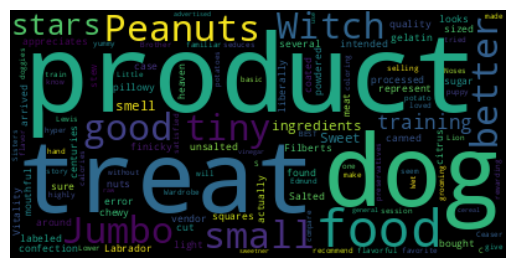

In [39]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = df['Text'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
# Applying data cleaning on Text column
df['CleanedReview'] = df['Text'].str.replace('[^\w\s]','').str.lower().str.replace(r's*https?://S+(s+|$)', ' ').str.strip()
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedReview
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...


# Sentiment Analysis using NLP Techniques

In [41]:
# Applying TextBlob to find out polarity and subjectivity in Text Column
from textblob import TextBlob
# Create two empty columns in the dataframe for polarity and subjectivity
df["polarity"] = ""
df["subjectivity"] = ""
# Get the text column from the dataframe
text_column = df["Text"]
# Use apply() to apply the TextBlob sentiment analysis to each row of the text column
df["polarity"] = text_column.apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = text_column.apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [42]:
# define a function to get the sentiment of a text using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# apply the function to the review column and create a new column for sentiment
df['Sentiment'] = df['CleanedReview'].apply(get_sentiment)

# print the first 10 rows of the dataframe
print(df.head(10))

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8   9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9  10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                  

# Determining the Tone of the Reviews

In [43]:
def get_sentiment_label(score):
    if score >= 0.51:
        return 'Positive'
    elif score <= 0.40:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment'].apply(get_sentiment_label)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedReview,polarity,subjectivity,Sentiment,Sentiment_Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,0.450000,0.433333,0.450000,Neutral
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,-0.033333,0.762963,-0.033333,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,0.133571,0.448571,0.133571,Negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,0.166667,0.533333,0.166667,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,0.483333,0.637500,0.483333,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,great for sesame chickenthis is a good if not ...,0.365000,0.605000,0.365000,Negative
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,im disappointed with the flavor the chocolate ...,-0.208333,0.408333,-0.250000,Negative
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",these stars are small so you can give 1015 of ...,-0.021875,0.418750,-0.021875,Negative
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,these are the best treats for training and rew...,0.517857,0.678571,0.521429,Positive


# Classification

In [44]:
# Creating Target column for score
df['Target'] = ''
# Create a function for applying threshold
def getTarget(rating):
  if rating <= 2:
    return 0
  else:
    return 1
# Apply threshold
df["Target"] = df["Score"].apply(getTarget)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedReview,polarity,subjectivity,Sentiment,Sentiment_Label,Target
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,0.450000,0.433333,0.450000,Neutral,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,-0.033333,0.762963,-0.033333,Negative,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,0.133571,0.448571,0.133571,Negative,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,0.166667,0.533333,0.166667,Negative,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,0.483333,0.637500,0.483333,Neutral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,great for sesame chickenthis is a good if not ...,0.365000,0.605000,0.365000,Negative,1
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,im disappointed with the flavor the chocolate ...,-0.208333,0.408333,-0.250000,Negative,0
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",these stars are small so you can give 1015 of ...,-0.021875,0.418750,-0.021875,Negative,1
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,these are the best treats for training and rew...,0.517857,0.678571,0.521429,Positive,1


In [45]:
# TF-IDF on clean review text
from sklearn.feature_extraction.text import TfidfVectorizer
def get_tfidf_vectors(df, text_column_name):
  # Create the vectorizer
  vectorizer = TfidfVectorizer()
  # Fit the vectorizer to the data
  vectorizer.fit(df[text_column_name])
  # Transform the text into tf-idf vectors
  tfidf_vectors = vectorizer.transform(df[text_column_name])
  return tfidf_vectors

In [46]:
# Creating classifier
X = get_tfidf_vectors(df, 'CleanedReview')
y = df['Target']

from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# to make this notebook's output stable across runs (reproducible results)
np.random.seed(123)

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=100)
# Create the Logistic Regression model and fit the data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

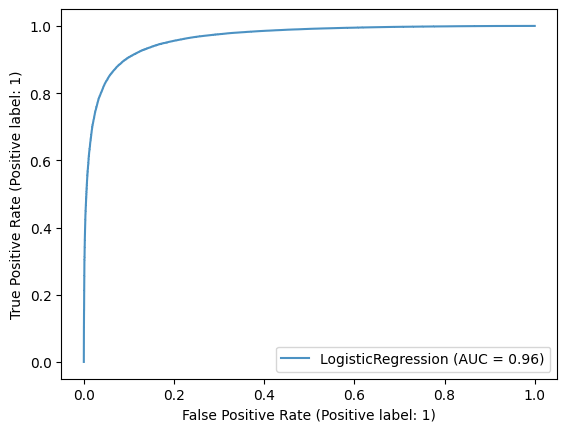

In [48]:
#Evaluate the model for performance metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()

#Training set ROC curve
lr_disp_train = RocCurveDisplay.from_estimator(lr_model, X_train, y_train,ax=ax, alpha=0.8)

In [49]:
#Test set ROC curve
lr_disp = RocCurveDisplay.from_estimator(lr_model, X_test, y_test, ax=ax,alpha=0.8)
plt.show()

In [50]:
#Predicting the fitted data
y_pred = lr_model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

# Evaluation and Performance Metrics

              precision    recall  f1-score   support

           0       0.82      0.63      0.71     24446
           1       0.94      0.98      0.96    146078

    accuracy                           0.93    170524
   macro avg       0.88      0.80      0.83    170524
weighted avg       0.92      0.93      0.92    170524



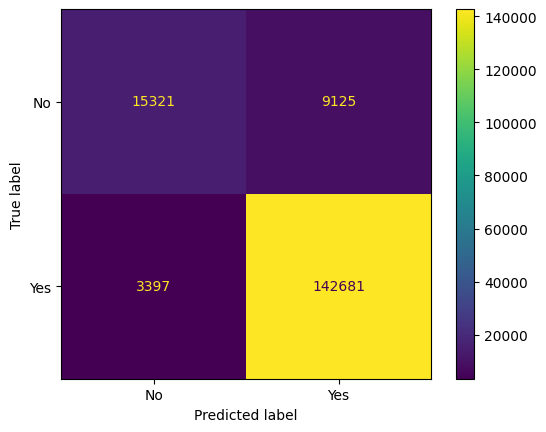

In [51]:
# Evaluating the model for metrics
import sklearn.metrics as metrics
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No', 'Yes'])
cm_display.plot()
plt.show()

In [52]:
#Discovering TP, TN, FP, FN from the confusion matrix
df_cm = confusion_matrix
TN, FP, FN, TP = df_cm.ravel()
print("TP: ", TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

TP:  142681
TN:  15321
FP:  9125
FN:  3397


In [53]:
#Computing different values
# Sensitivity, hit rate, recall, or true positive rate
TPR = round(TP/(TP+FN), 4)
print('TPR :', TPR)
# Specificity or true negative rate
TNR = round(TN/(TN+FP), 4)
print('TNR :', TNR)
# Precision or positive predictive value
PPV = round(TP/(TP+FP), 4)
print('PPV :', PPV)
# Fall out or false positive rate
FPR = round(FP/(FP+TN), 4)
print('FPR :', FPR)
# False negative rate
FNR = round(FN/(TP+FN), 4)
print('FNR :', FNR)
# Overall accuracy
ACC = round ((TP+TN)/(TP+FP+FN+TN), 4)
print('ACC :', ACC)

TPR : 0.9767
TNR : 0.6267
PPV : 0.9399
FPR : 0.3733
FNR : 0.0233
ACC : 0.9266


In [54]:
# Performance Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
print('Recall :', round(recall_score(y_test, y_pred), 4))
print('Accuracy :', round(accuracy_score(y_test, y_pred), 4))
print('Balanced Accuracy :', round(balanced_accuracy_score(y_test, y_pred), 4))
print('f1-Score : ', round(f1_score(y_test, y_pred), 4))

Recall : 0.9767
Accuracy : 0.9266
Balanced Accuracy : 0.8017
f1-Score :  0.958
